In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
"""
copyright 2016-2017 Dan Aukes
"""
import matplotlib.pyplot as plt
import sympy
import numpy
from sympy import pi

#thickness
h = sympy.Symbol('h')

#point load on end
P = sympy.Symbol('P')

#length of beam
l = sympy.Symbol('l')

#young's modulus
E = sympy.Symbol('E')

#position along beam
x = sympy.Symbol('x')

#distributed load
w = sympy.Symbol('w')

#moment on end of beam
m_end = sympy.Symbol('m_end')

Define the width of the beam, b, either as a symbol, expression, or constant.

In [3]:
b = sympy.Symbol('b')
#b = (l-x)**2
#b = (l-x)
b

b

In [4]:
point_load = -1
distributed_load = 0
applied_moment = 0

In [5]:
constants = {}
constants[b]=1
constants[h]=1
constants[l]=1
constants[E]=10
constants[P]=point_load
constants[m_end]=applied_moment
constants[w]=distributed_load

(-0.050000000000000003, 1.05, -0.55000000000000004, 0.55000000000000004)

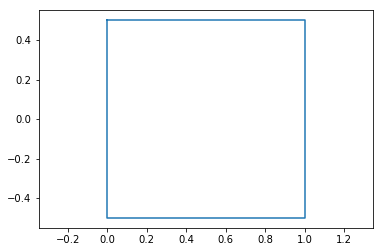

In [6]:
x2 = numpy.r_[0:constants[l]:100j]
b = b.subs(constants)
fp = sympy.lambdify(x,b)
pn = numpy.r_[[fp(item) for item in x2]]
f = plt.figure()
profile_x = numpy.r_[x2,x2[::-1],x2[0:1]]
profile_y = numpy.r_[pn/2,-(pn/2)[::-1],pn[0:1]/2]
plt.plot(profile_x,profile_y)
plt.axis('equal')

Define the cross-sectional moment of inertia, either as a symbol or expression

In [7]:
#symbol
#I = sympy.Symbol('I')

#for a rectangle centered about the neutral axis
I = b*h**3/12
I

h**3/12

Define loading

In [8]:
M = sympy.Number(0)

if point_load != 0:
    #point load at the end
    M += P*(l-x)

if applied_moment!=0:
    #Moment applied to the end
    M += m_end

if distributed_load!=0:
    #distributed load
    M += sympy.integrate(w*x,(x,0,l-x))
M

P*(l - x)

In [9]:
dtheta = M/(E*I)
dtheta

12*P*(l - x)/(E*h**3)

In [10]:
theta = sympy.integrate(dtheta,(x,0,x))
theta

12*P*l*x/(E*h**3) - 6*P*x**2/(E*h**3)

In [11]:
theta.subs({x:l})

6*P*l**2/(E*h**3)

In [12]:
y = sympy.integrate(theta,(x,0,x))
y

6*P*l*x**2/(E*h**3) - 2*P*x**3/(E*h**3)

In [13]:
y.subs({x:l})

4*P*l**3/(E*h**3)

plot with real values

In [14]:
x2 = numpy.r_[0:constants[l]:100j]
y2 = y.subs(constants)
fy = sympy.lambdify(x,y2)
y3 = numpy.r_[[fy(item) for item in  numpy.r_[0:constants[l]:100j]]]
y2

x**3/5 - 3*x**2/5

(-0.050000000000000003, 1.05, -0.41999999999999998, 0.02)

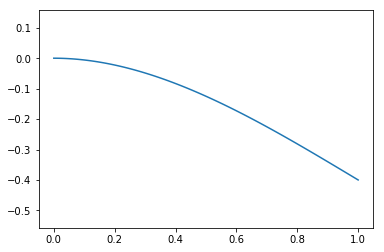

In [15]:
plt.plot(x2,y3)
plt.axis('equal')

This next chunk of code only works for a symmetric laminate!

In [16]:
materials = []
materials.append(['cardboard',10,.2])
materials.append(['adhesive',10,.2])
materials.append(['kapton',10,.2])
materials.append(['adhesive',10,.2])
materials.append(['cardboard',10,.2])

EI = 0
thickness = 0

for material,E,t in materials:
    thickness+=t

zz = -thickness/2

EI=0
for material,E,t in materials:
    EI += b*E*((zz+t)**3-zz**3)
    zz+=t
EI/=3
    

In [17]:
dtheta = M/(EI)
dtheta

1.2*P*(l - x)

In [18]:
theta = sympy.integrate(dtheta,(x,0,x))
theta

1.2*P*l*x - 0.6*P*x**2

In [19]:
theta.subs({x:l})

0.6*P*l**2

In [20]:
y = sympy.integrate(theta,(x,0,x))
y

0.6*P*l*x**2 - 0.2*P*x**3

In [21]:
y.subs({x:l})

0.4*P*l**3

plot with real values

(-0.050000000000000003, 1.05, -0.41999999999999998, 0.02)

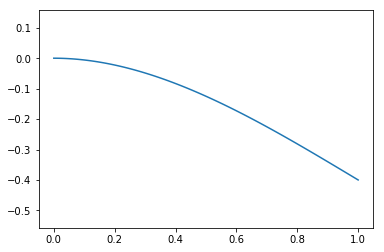

In [22]:
y2 = y.subs(constants)
fy = sympy.lambdify(x,y2)
y3 = numpy.r_[[fy(item) for item in  numpy.r_[0:constants[l]:100j]]]
plt.plot(x2,y3)
plt.axis('equal')